<a href="https://colab.research.google.com/github/maskot1977/ComputerExercises2022/blob/D24zEsB2eLVQULpR/12%E6%9C%886%E6%97%A5%E8%AC%9B%E7%BE%A9%E5%88%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第66章：ラグランジュ補間

In [ ]:
import numpy as np
f = lambda x: 1/(1 + np.exp(-x))
g = lambda x: 1.0/(1.0+x**2)
h = lambda x: np.sin(x)

x_observed = np.linspace(-10, 10, 11) # 観測点

fx_observed = f(x_observed) # f(x) の観測値
gx_observed = g(x_observed) # g(x) の観測値
hx_observed = h(x_observed) # h(x) の観測値

In [ ]:
x_observed

array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.])

In [ ]:
fx_observed

array([4.53978687e-05, 3.35350130e-04, 2.47262316e-03, 1.79862100e-02,
       1.19202922e-01, 5.00000000e-01, 8.80797078e-01, 9.82013790e-01,
       9.97527377e-01, 9.99664650e-01, 9.99954602e-01])

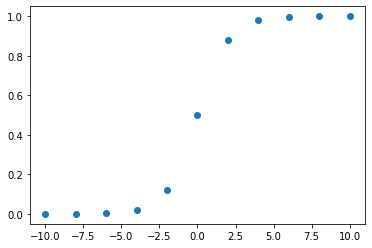

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_observed, fx_observed)

In [ ]:
x_latent = np.linspace(-10, 10, 101)
x_latent

array([-10. ,  -9.8,  -9.6,  -9.4,  -9.2,  -9. ,  -8.8,  -8.6,  -8.4,
        -8.2,  -8. ,  -7.8,  -7.6,  -7.4,  -7.2,  -7. ,  -6.8,  -6.6,
        -6.4,  -6.2,  -6. ,  -5.8,  -5.6,  -5.4,  -5.2,  -5. ,  -4.8,
        -4.6,  -4.4,  -4.2,  -4. ,  -3.8,  -3.6,  -3.4,  -3.2,  -3. ,
        -2.8,  -2.6,  -2.4,  -2.2,  -2. ,  -1.8,  -1.6,  -1.4,  -1.2,
        -1. ,  -0.8,  -0.6,  -0.4,  -0.2,   0. ,   0.2,   0.4,   0.6,
         0.8,   1. ,   1.2,   1.4,   1.6,   1.8,   2. ,   2.2,   2.4,
         2.6,   2.8,   3. ,   3.2,   3.4,   3.6,   3.8,   4. ,   4.2,
         4.4,   4.6,   4.8,   5. ,   5.2,   5.4,   5.6,   5.8,   6. ,
         6.2,   6.4,   6.6,   6.8,   7. ,   7.2,   7.4,   7.6,   7.8,
         8. ,   8.2,   8.4,   8.6,   8.8,   9. ,   9.2,   9.4,   9.6,
         9.8,  10. ])

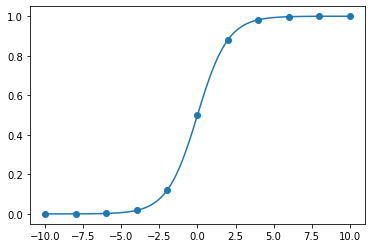

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_observed, fx_observed)
plt.plot(x_latent, f(x_latent))

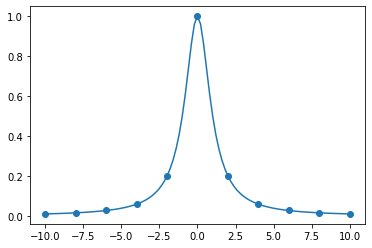

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_observed, gx_observed)
plt.plot(x_latent, g(x_latent))

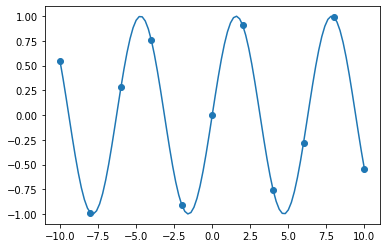

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_observed, hx_observed)
plt.plot(x_latent, h(x_latent))

In [ ]:
def get_coeff(i, x, x_observed):
    c = 1
    for j in range(len(x_observed)):
        if j != i:
            c *= (x - x_observed[j]) / (x_observed[i] - x_observed[j])
    return c

In [ ]:
def lagrange(x, x_observed, y_observed):
    sum = 0
    for i in range(len(x_observed)):
        sum += get_coeff(i, x, x_observed) * y_observed[i]
    return sum

In [ ]:
lagrange(0.33, x_observed, fx_observed)

0.5747428300788222

In [ ]:
lagrange([0.33, 0.45, 9.12], x_observed, fx_observed)

array([0.57474283, 0.60148861, 0.88084744])

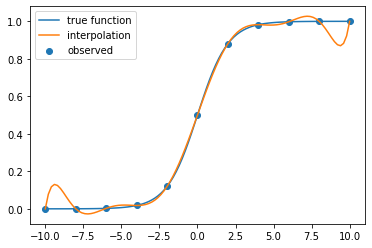

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_observed, fx_observed, label="observed")
plt.plot(x_latent, f(x_latent), label="true function")
plt.plot(x_latent, lagrange(x_latent, x_observed, fx_observed), label="interpolation")
plt.legend()
plt.show()

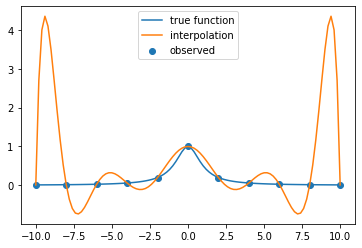

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_observed, gx_observed, label="observed")
plt.plot(x_latent, g(x_latent), label="true function")
plt.plot(x_latent, lagrange(x_latent, x_observed, gx_observed), label="interpolation")
plt.legend()
plt.show()

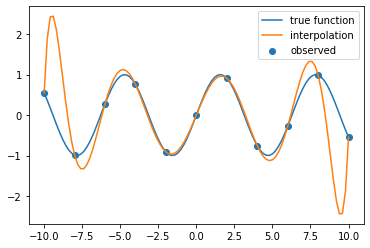

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_observed, hx_observed, label="observed")
plt.plot(x_latent, h(x_latent), label="true function")
plt.plot(x_latent, lagrange(x_latent, x_observed, hx_observed), label="interpolation")
plt.legend()
plt.show()

# 第67章：スプライン補間

In [ ]:
def spline(x_latent, x_observed, y_observed):
    n = len(x_observed) - 1 # 定義する3次式の個数
    A = np.zeros((4*n, 4*n)) # 連立方程式の左辺の初期化
    b = np.zeros(4 * n) # 連立方程式の右辺の初期化
    for i in range(n - 1):
        # n-1個の第１式
        A[4*i][4*i+0] = x_observed[i] ** 3
        A[4*i][4*i+1] = x_observed[i] ** 2
        A[4*i][4*i+2] = x_observed[i]
        A[4*i][4*i+3] = 1
        b[4*i] = y_observed[i]

        # n-1個の第2式
        A[4*i+1][4*i+0] = x_observed[i+1] ** 3
        A[4*i+1][4*i+1] = x_observed[i+1] ** 2
        A[4*i+1][4*i+2] = x_observed[i+1]
        A[4*i+1][4*i+3] = 1
        b[4*i+1] = y_observed[i+1]

        # n-1個の第3式
        A[4*i+2][4*i+0] = 3 * x_observed[i+1] ** 2
        A[4*i+2][4*i+1] = 2 * x_observed[i+1]
        A[4*i+2][4*i+2] = 1
        A[4*i+2][4*i+4] = -3 * x_observed[i+1] ** 2
        A[4*i+2][4*i+5] = -2 * x_observed[i+1]
        A[4*i+2][4*i+6] = -1

        # n-1個の第4式
        A[4*i+3][4*i+0] = 6 * x_observed[i+1]
        A[4*i+3][4*i+1] = 2
        A[4*i+3][4*i+4] = -6 * x_observed[i+1]
        A[4*i+3][4*i+5] = -2

    # 第５式
    A[4*n-4][4*n-4] = x_observed[n-1] ** 3
    A[4*n-4][4*n-3] = x_observed[n-1] ** 2
    A[4*n-4][4*n-2] = x_observed[n-1] 
    A[4*n-4][4*n-1] = 1
    b[4*n-4] = y_observed[n-1]

    # 第６式
    A[4*n-3][4*n-4] = x_observed[n] ** 3
    A[4*n-3][4*n-3] = x_observed[n] ** 2
    A[4*n-3][4*n-2] = x_observed[n]
    A[4*n-3][4*n-1] = 1
    b[4*n-3] = y_observed[n]

    # 第７式
    A[4*n-2][0] = 6 * x_observed[0]
    A[4*n-2][1] = 2

    # 第８式
    A[4*n-1][4*n-4] = 6 * x_observed[n]
    A[4*n-1][4*n-3] = 2

    coeff = np.linalg.solve(A, b) # 連立方程式を解く

    #補間する
    interpolated = []
    for x in x_latent:
        for j in range(len(x_observed - 1)):
            if x_observed[j] <= x and x <= x_observed[j + 1]:
                a = coeff[4*j]
                b = coeff[4*j+1]
                c = coeff[4*j+2]
                d = coeff[4*j+3]
                y = a*x**3 + b*x**2 + c*x + d
                interpolated.append(y)
                break
    return interpolated 

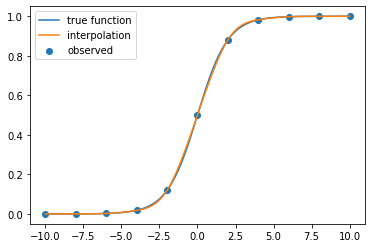

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_observed, fx_observed, label="observed")
plt.plot(x_latent, f(x_latent), label="true function")
plt.plot(x_latent, spline(x_latent, x_observed, fx_observed), label="interpolation")
plt.legend()
plt.show()

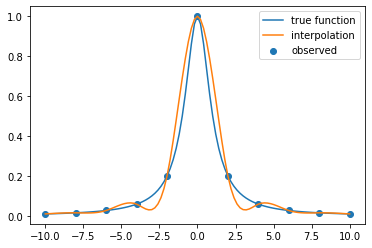

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_observed, gx_observed, label="observed")
plt.plot(x_latent, g(x_latent), label="true function")
plt.plot(x_latent, spline(x_latent, x_observed, gx_observed), label="interpolation")
plt.legend()
plt.show()

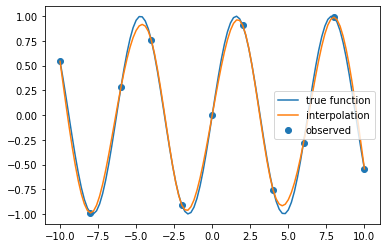

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_observed, hx_observed, label="observed")
plt.plot(x_latent, h(x_latent), label="true function")
plt.plot(x_latent, spline(x_latent, x_observed, hx_observed), label="interpolation")
plt.legend()
plt.show()

# 第68章：最小二乗法による多項式近似

In [ ]:
f2 = lambda x: x**3 + 2*x**2 - 6*x + 4

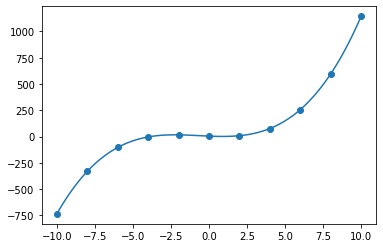

In [ ]:
plt.scatter(x_observed, f2(x_observed))
plt.plot(x_latent, f2(x_latent))

In [ ]:
x_ones = np.ones(len(x_observed))
x_ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
x_observed * x_ones

array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.])

In [ ]:
d = 3
x_tmp = x_ones
X_tmp = [x_tmp]
for i in range(d):
    x_tmp = x_observed * x_tmp
    X_tmp.append(x_tmp)

X_tmp = np.matrix(X_tmp)
X_tmp

matrix([[    1.,     1.,     1.,     1.,     1.,     1.,     1.,     1.,
             1.,     1.,     1.],
        [  -10.,    -8.,    -6.,    -4.,    -2.,     0.,     2.,     4.,
             6.,     8.,    10.],
        [  100.,    64.,    36.,    16.,     4.,     0.,     4.,    16.,
            36.,    64.,   100.],
        [-1000.,  -512.,  -216.,   -64.,    -8.,     0.,     8.,    64.,
           216.,   512.,  1000.]])

In [ ]:
S = X_tmp * X_tmp.T
S

matrix([[1.10000e+01, 0.00000e+00, 4.40000e+02, 0.00000e+00],
        [0.00000e+00, 4.40000e+02, 0.00000e+00, 3.13280e+04],
        [4.40000e+02, 0.00000e+00, 3.13280e+04, 0.00000e+00],
        [0.00000e+00, 3.13280e+04, 0.00000e+00, 2.62592e+06]])

In [ ]:
T = X_tmp @ f2(x_observed).reshape(len(x_observed), 1)
T

matrix([[9.240000e+02],
        [2.868800e+04],
        [6.441600e+04],
        [2.437952e+06]])

In [ ]:
np.linalg.solve(S, T)

matrix([[ 4.],
        [-6.],
        [ 2.],
        [ 1.]])

In [ ]:
import numpy as np
def get_coeff_poly(x_observed, y_observed, d=3):
    x_ones = np.ones(len(x_observed))
    x_tmp = x_ones
    X_tmp = [x_tmp]
    for i in range(d):
        x_tmp = x_observed * x_tmp
        X_tmp.append(x_tmp)
    X_tmp = np.matrix(X_tmp)
    S = X_tmp * X_tmp.T
    T = X_tmp @ y_observed.reshape(len(x_observed), 1)
    return np.linalg.solve(S, T).reshape(1, d+1).A1

In [ ]:
get_coeff_poly(x_observed, f2(x_observed), d=3)

array([ 4., -6.,  2.,  1.])

In [ ]:
get_coeff_poly(x_observed, f2(x_observed), d=4)

array([ 4., -6.,  2.,  1.,  0.])

In [ ]:
def fit_polynominal(coeff, x_latent):
    y = 0
    for i in range(len(coeff)):
        y += coeff[i] * pow(x_latent, i)
    return y

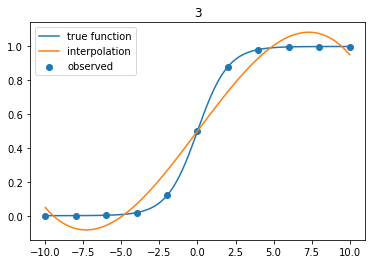

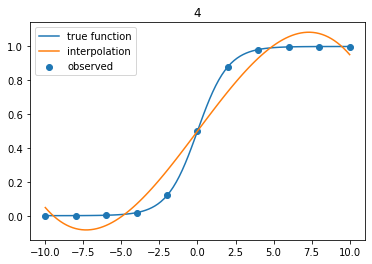

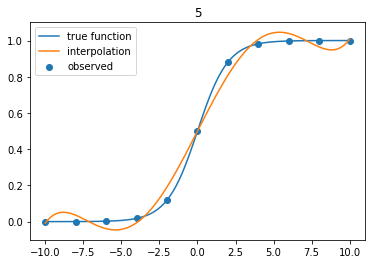

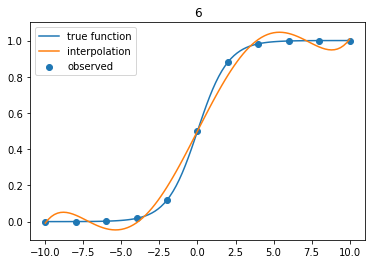

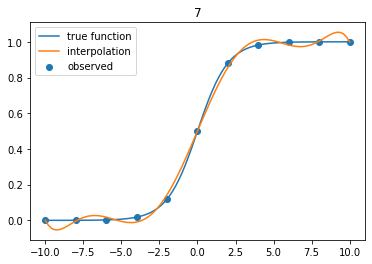

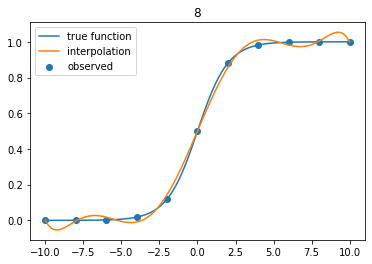

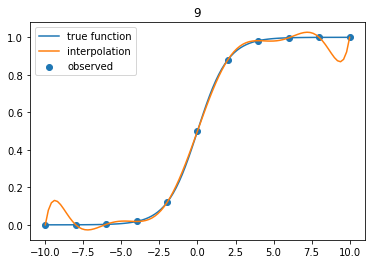

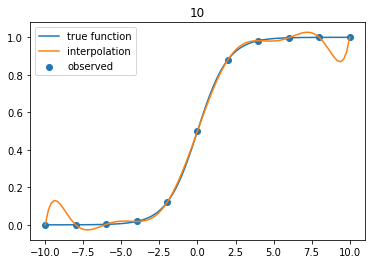

In [ ]:
import matplotlib.pyplot as plt

for d in range(3, 11):
    coeff = get_coeff_poly(x_observed, fx_observed, d=d)
    y_pred = fit_polynominal(coeff, x_latent)
    plt.title(d)
    plt.scatter(x_observed, fx_observed, label="observed")
    plt.plot(x_latent, f(x_latent), label="true function")
    plt.plot(x_latent, y_pred, label="interpolation")
    plt.legend()
    plt.show()

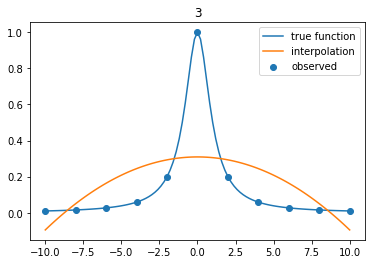

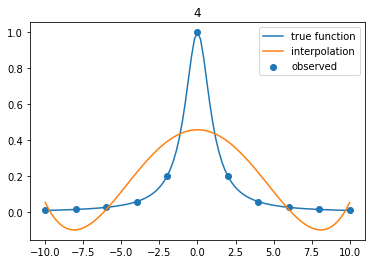

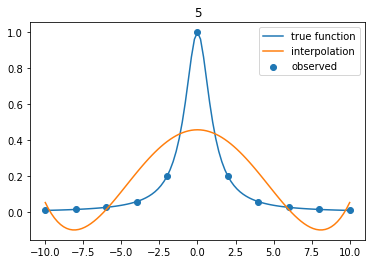

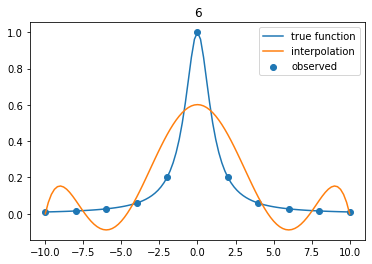

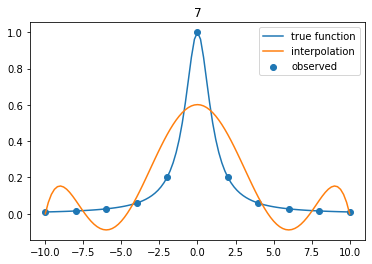

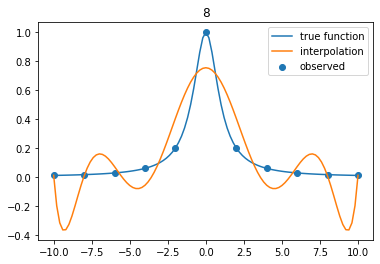

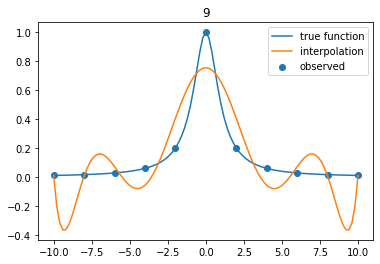

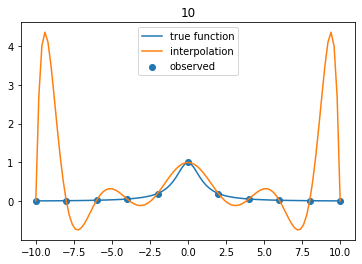

In [ ]:
import matplotlib.pyplot as plt

for d in range(3, 11):
    coeff = get_coeff_poly(x_observed, gx_observed, d=d)
    y_pred = fit_polynominal(coeff, x_latent)
    plt.title(d)
    plt.scatter(x_observed, gx_observed, label="observed")
    plt.plot(x_latent, g(x_latent), label="true function")
    plt.plot(x_latent, y_pred, label="interpolation")
    plt.legend()
    plt.show()

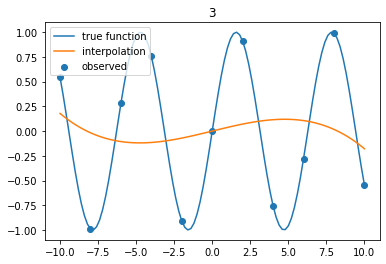

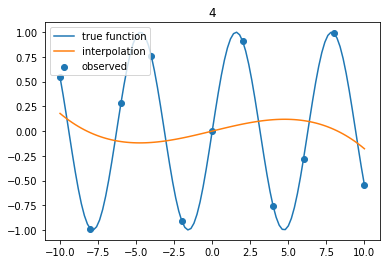

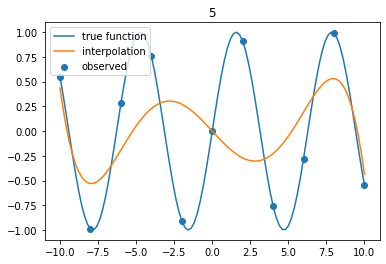

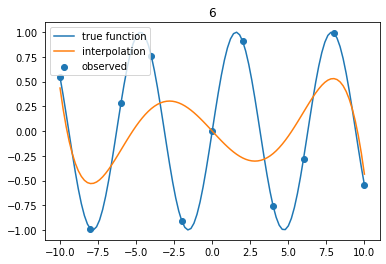

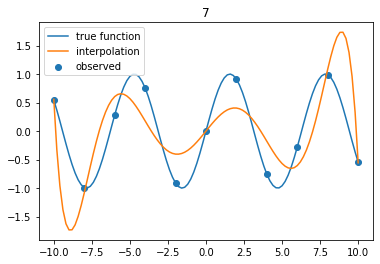

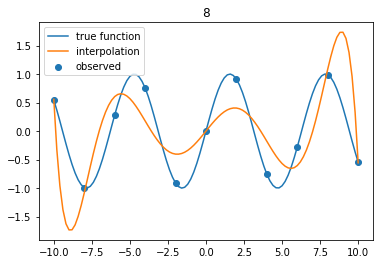

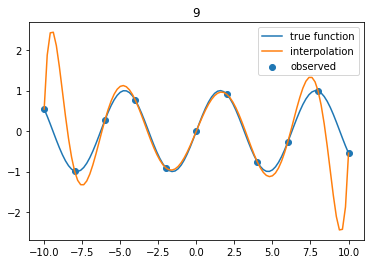

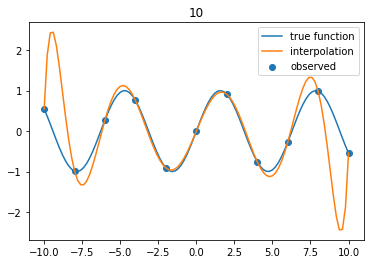

In [ ]:
import matplotlib.pyplot as plt

for d in range(3, 11):
    coeff = get_coeff_poly(x_observed, hx_observed, d=d)
    y_pred = fit_polynominal(coeff, x_latent)
    plt.title(d)
    plt.scatter(x_observed, hx_observed, label="observed")
    plt.plot(x_latent, h(x_latent), label="true function")
    plt.plot(x_latent, y_pred, label="interpolation")
    plt.legend()
    plt.show()

# 第69章： RMSEとMAE

In [ ]:
X = [-10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8,  10]

Y_pred = [1.0, 0.27, -0.076, -0.191, -0.153, 0.0, 0.23, 0.46, 0.537, 0.191, -1.0]

Y_observed = [1.12, 0.28, -0.18, -0.27, -0.13, 0.21, 0.36, 0.49, 0.42, -0.05, -0.85]

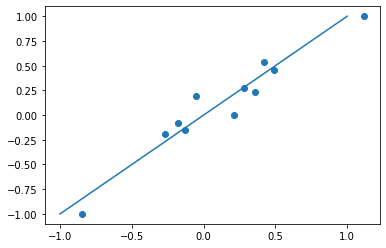

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(Y_observed, Y_pred)
plt.plot([-1, 1], [-1, 1])

In [ ]:
def mae(y_pred, y_observed):
    sum = 0
    for yp, yo in zip(y_pred, y_observed):
        sum += abs(yp - yo)
    return sum / len(y_pred)

In [ ]:
def mae_np(y_pred, y_observed):
    return np.abs(np.array(y_pred) - np.array(y_observed)).mean()

In [ ]:
mae(Y_pred, Y_observed)

0.11036363636363636

In [ ]:
mae_np(Y_pred, Y_observed)

0.11036363636363636

In [ ]:
def rmse(y_pred, y_observed):
    sum = 0
    for yp, yo in zip(y_pred, y_observed):
        sum += (yp - yo)**2
    return (sum / len(y_pred))**0.5

In [ ]:
def rmse_np(y_pred, y_observed):
    return np.sqrt(((np.array(y_pred) - np.array(y_observed))**2).mean())

In [ ]:
rmse(Y_pred, Y_observed)

0.1308211826050423

In [ ]:
rmse_np(Y_pred, Y_observed)

0.1308211826050423

# 第70章：L1正則化とL2正則化

In [ ]:
X = [-10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8,  10]
Y_observed = [1.12, 0.28, -0.18, -0.27, -0.13, 0.21, 0.36, 0.49, 0.42, -0.05, -0.85]

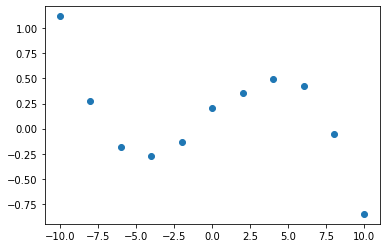

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X, Y_observed)

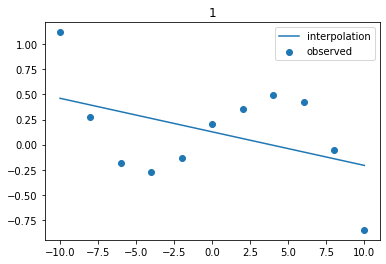

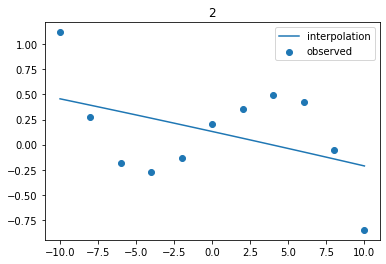

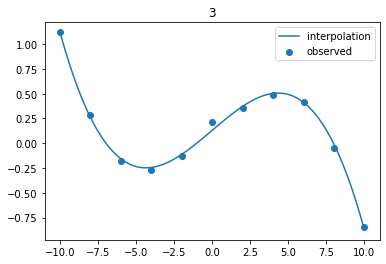

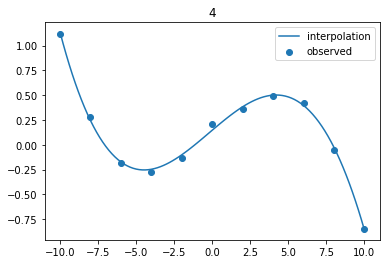

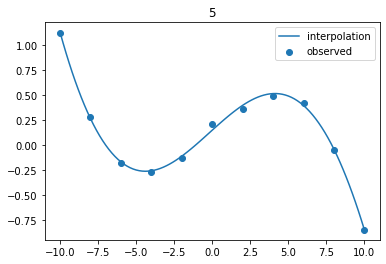

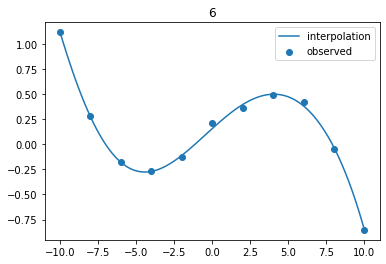

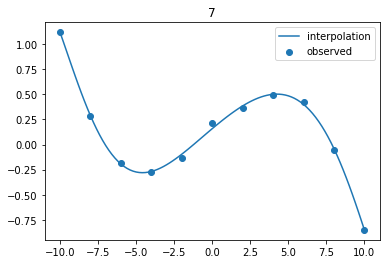

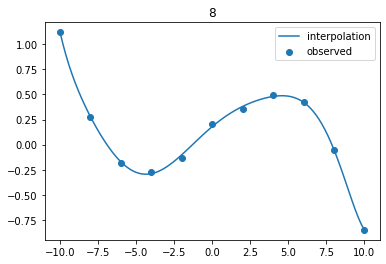

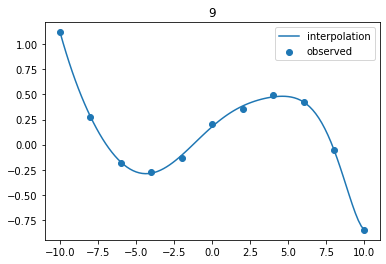

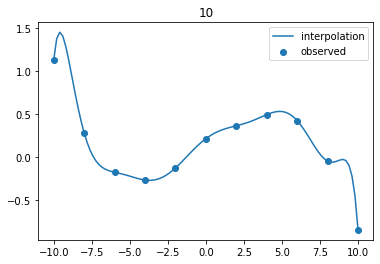

In [ ]:
import matplotlib.pyplot as plt

X = np.array(X)
Y_observed = np.array(Y_observed)
for d in range(1, 11):
    coeff = get_coeff_poly(X, Y_observed, d=d)
    y_pred = fit_polynominal(coeff, x_latent)
    plt.title(d)
    plt.scatter(X, Y_observed, label="observed")
    #plt.plot(x_latent, h(x_latent), label="true function")
    plt.plot(x_latent, y_pred, label="interpolation")
    plt.legend()
    plt.show()

In [ ]:
def regularization(y_observed, y_pred, measure, coeff, norm, lambda_):
    loss = measure(y_observed, y_pred)
    if norm == 1:
        return loss + lambda_ * np.abs(coeff).sum()
    else:
        return loss + lambda_ * np.abs(coeff**2).sum() / 2

In [ ]:
norm = 1
lambda_ = 1
measure = mae
X = np.array(X)
Y_observed = np.array(Y_observed)
for d in range(1, 11):
    coeff = get_coeff_poly(X, Y_observed, d=d)
    y_pred = fit_polynominal(coeff, X)
    print(d, regularization(Y_observed, y_pred, measure, coeff, norm, lambda_))

1 0.5463471074380165
2 0.549613159567705
3 0.28742843646252736
4 0.30450335964540504
5 0.3076943088280089
6 0.31927714882217173
7 0.3075578324525189
8 0.33261942207082673
9 0.3382305188876867
10 0.3825261549102931
